In [1]:
import numpy as np
import math

from numpy import exp
from scipy.interpolate import interp1d,InterpolatedUnivariateSpline
from scipy.integrate import cumtrapz, quad
from scipy.special import erf

from WIMpy import DMUtils as DMU

from matplotlib import pyplot as plt
from matplotlib.ticker import LogLocator

import matplotlib as mpl
from matplotlib import rc
rc('text', usetex=True)
rc('font',**{'family':'sans-serif','sans-serif':['cmr']})
rc('font',**{'family':'serif','serif':['cmr']})
rc('font', size=16)

mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True

import paleopy as paleopy

import os.path

In [2]:
from scipy.optimize import curve_fit

In [4]:

dirname = '../Resconi.txt'
e, flux = np.loadtxt(dirname, usecols = (0, 1), delimiter = ' ', unpack = 'true')
n = 20
E = np.zeros(n)
F = np.zeros(n)
for i in range(n):
    E[i] = e[i]*1e3 #MeV
    F[i] = flux[i]/((e[i]**3)*1e3) #cm^-2 sr^-1 s^-1 MeV^-1

In [5]:
def func(x, a, b, c, d, e):
    return a + b * x + c * x**2 + d * x**3 + e * x**4

In [6]:
popt, pcov = curve_fit(func, E, F)

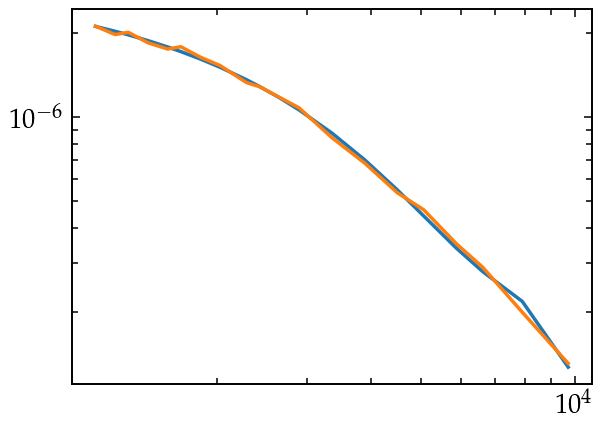

In [7]:
plt.loglog(E, func(E, *popt))
plt.loglog(E, F)

10.0 3.215397963790618e-06
21.25 3.2028699322421566e-06
32.5 3.1903799907564894e-06
43.75 3.1779280688518126e-06
55.0 3.1655140960933146e-06
66.25 3.1531380020931723e-06
77.5 3.140799716510554e-06
88.75 3.12849916905162e-06
100.0 3.1162362894695194e-06


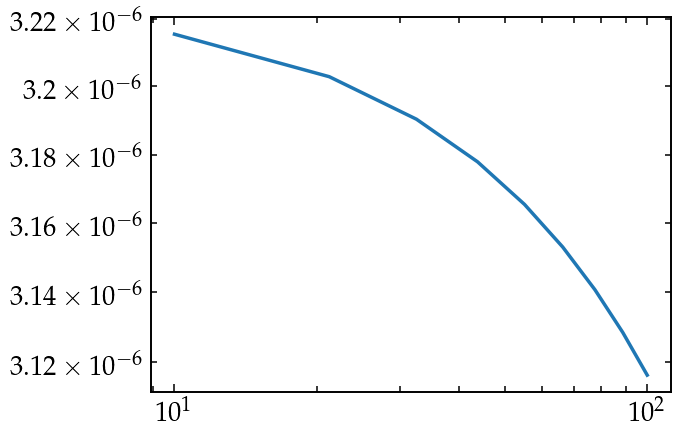

In [8]:
En = np.linspace(10, 100, 9)
for i in range(9):
    print(En[i], func(En[i], *popt))
plt.loglog(En, func(En, *popt))

In [9]:
Ezr = 15
f = lambda x : func(x, *popt)
Number1 = quad(f, 0, Ezr)[0]*np.pi*1*3600*24*365*1e6 #flux in Myr^-1
Number100 = quad(f, 0, 100)[0]*np.pi*100*3600*24*365*1e6
print(Number1)
print(Number100)

4782548872.976762
3141763401620.8765


In [10]:
count_U = np.loadtxt('U238histo.dat', usecols=(2), unpack = 'true')
count_Th = np.loadtxt('Th232histo.dat', usecols=(2), unpack='true')
print(count_Th)

[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000

In [18]:
numU = 0.
numTh = 0.
for i,e in enumerate(count_U):
    numU += count_U[i]
    numTh += count_Th[i]
print(numU,numTh)

100000.0 100000.0


In [11]:
n_bins = 200
x_min = -1 #log scale in nm
x_max = 5 #log scale in nm

lenght = np.logspace(x_min,x_max,n_bins)
#I consder the range between 1 nm and 10^5 nm

In [12]:
lenght_width = np.diff(lenght)
lenght_mid   = lenght[:-1] + lenght_width/2

print(lenght_mid)

[1.03594566e-01 1.11042116e-01 1.19025080e-01 1.27581950e-01
 1.36753985e-01 1.46585409e-01 1.57123628e-01 1.68419453e-01
 1.80527349e-01 1.93505699e-01 2.07417078e-01 2.22328566e-01
 2.38312060e-01 2.55444628e-01 2.73808879e-01 2.93493361e-01
 3.14592986e-01 3.37209491e-01 3.61451926e-01 3.87437182e-01
 4.15290552e-01 4.45146337e-01 4.77148495e-01 5.11451329e-01
 5.48220240e-01 5.87632517e-01 6.29878193e-01 6.75160968e-01
 7.23699180e-01 7.75726869e-01 8.31494897e-01 8.91272162e-01
 9.55346893e-01 1.02402804e+00 1.09764677e+00 1.17655804e+00
 1.26114235e+00 1.35180754e+00 1.44899077e+00 1.55316063e+00
 1.66481939e+00 1.78450545e+00 1.91279591e+00 2.05030933e+00
 2.19770877e+00 2.35570495e+00 2.52505969e+00 2.70658956e+00
 2.90116985e+00 3.10973878e+00 3.33330201e+00 3.57293748e+00
 3.82980067e+00 4.10513010e+00 4.40025331e+00 4.71659333e+00
 5.05567545e+00 5.41913462e+00 5.80872336e+00 6.22632015e+00
 6.67393851e+00 7.15373676e+00 7.66802833e+00 8.21929300e+00
 8.81018882e+00 9.443564

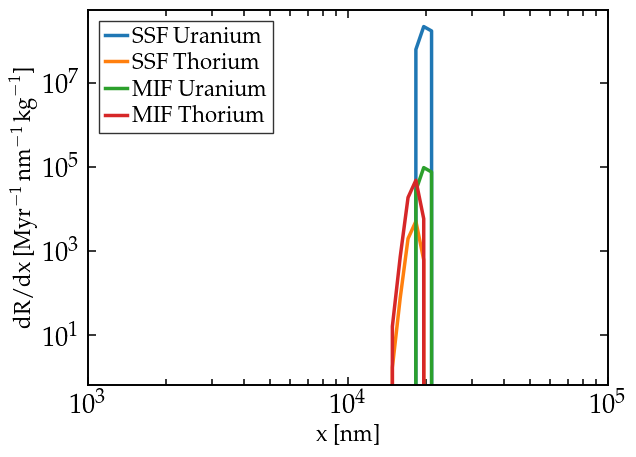

In [15]:
Na  = 6.022e23
rho_Zirc = 4.7
mass = 10**3*rho_Zirc*1e-3

# decay time for U and Th
tau_U = 6.45e3 #Myr 
tau_Th = 1.405e4/np.log(2) # Myr
# branching ratio of the spotaneous fission
BR_U = 5.4e-7
BR_Th = 1.1e-11
# fractions considered in the mineral (very high)
fraction_U = 0.003
fraction_Th = 0.007

# factors to evaluate the track rate 
# it should be noted that the spontaneous fission has to consider the avogadro number, since from the tracks per 1e5 decays we have to find the tracks per mass
# the induced fission has just the fraction since 0.14 and 0.02 are already the number of decays per kg of material
factor_U = 1e-5*(BR_U)*((fraction_U)*Na*1e3/(238))/tau_U
factor_Uind = 1e-5*(0.14*Number100)*(fraction_U)/mass*(np.exp(-1/tau_U))
factor_Th = 1e-5*(BR_Th)*((fraction_Th)*Na*1e3/(232))/tau_Th
factor_Thind = 1e-5*(0.02*Number100)*(fraction_Th)/mass*(np.exp(-1/tau_Th))
#1e-5 perchè conto il numero di tracce per fissione, 0.14*Number il numero di fissioni se fosse tutto U

plt.figure()
plt.loglog(lenght_mid,count_U*factor_U/lenght_width, label='SSF Uranium')
plt.loglog(lenght_mid,count_Th*factor_Th/lenght_width, label='SSF Thorium')
plt.loglog(lenght_mid,count_U*factor_Uind/lenght_width, label='MIF Uranium')
plt.loglog(lenght_mid,count_Th*factor_Thind/lenght_width, label='MIF Thorium')
ax = plt.gca()

plt.ylabel("dR/dx [$\\mathrm{Myr}^{-1}\,\\mathrm{nm}^{-1}\,\\mathrm{kg}^{-1}$]")
plt.xlabel("x [nm]")
plt.legend()
plt.xlim(1e3,1e5)
plt.savefig("MuonFission.pdf",bbox_inches="tight")
plt.show()



In [16]:
f = open("Zircon_fission.dat", "w")
print("# Spontaneous Fission Fragments of Uranium-238", file = f)
print("# Data from GEF", file = f)
print("# x [nm] , dR/dx [1/nm/kg/Myr]", file = f)

for i in range(n_bins-1):
    print(lenght_mid[i], count_U[i]*factor_U/lenght_width[i], sep = "  ", file = f)

f.close()

# Confront

In [21]:

mass = (1**3)*rho_Zirc*1e-3
Na  = 6.022e23

tau_U = 6.45e3 #Myr 
tau_Th = 1.405e4/np.log(2)
BR_U = 5.4e-7
BR_Th = 1.1e-11

TotU = 0
TotTh = 0

f1U = 0.003
f1Th = 0.00
f2U = 0.003
f2Th = 0.059

CU = (BR_U)*(Na*1e3/(238))/tau_U*mass #[Myr^-1]
CUind = (0.14*Number100) #[Myr^-1]
CTh = (BR_Th)*(Na*1e3/(232))/tau_Th*mass #[Myr^-1]
CThind = (0.02*Number100) #[Myr^-1]

time = 1000e-6 #Myr 

N1 = (f1U*(CU+CUind)+f1Th*CThind)*time
N2 = (f2U*(CU+CUind)+f2Th*CThind)*time

N1no = f1U*CU*time
N2no = f2U*CU*time

print(CU, CUind)
print(N1,N2,N1no,N2no)
print(N2/N1, N2no/N1no)
print(N2/N1*np.sqrt(1./N2+1./N1),N2no/N1no*np.sqrt(1./N2no+1./N1no))

C = [[CU,CUind],[CTh,CThind]]
f = [[f1U,f1Th],[f2U,f2Th]]

N1 = 0
N2 = 0

for j in range(2):
    for k in range(2):
        N1 += f[0][j]*C[j][k]*time
        N2 += f[1][j]*C[j][k]*time

print(N1,N2)

995624780144.6161 439846876226.9227
4306414.9691146165 8013695.78302725 2986874.3404338486 2986874.3404338486
1.8608740310678507 1.0
0.0011118595154643116 0.0008182886395908124
4306414.9691146165 8014086.394016935


In [22]:
Ezr = 15
f = lambda x : func(x, *popt)
Number1 = quad(f, 0, Ezr)[0]*np.pi*1*3600*24*365*1e6 #flux in Myr^-1
Number100 = quad(f, 0, 100)[0]*np.pi*100*3600*24*365*1e6
print(Number1)
print(Number100)

4782548872.976762
3141763401620.8765


In [28]:
def NUsp(fU, time):
    CU = (BR_U)*(Na*1e3/(238))*mass/tau_U
    return fU*CU*time

def NThsp(fTh, time):
    CTh = (BR_Th)*(Na*1e3/(232))*mass/tau_Th
    return fTh*CTh*time

def NUind(fU, time, Number):
    CUind = (0.14*Number)
    return fU*CUind*time

def NThind(fTh, time, Number):
    CThind = (0.02*Number)
    return fTh*CThind*time

def Ind(fU, fTh, time, Number):
    return NThsp(fTh,time)+NUsp(fU,time)+NUind(fU,time, Number)+NThind(fTh,time, Number)

def Inddiff(fU, fTh, time, timeind, Number):
    return NThsp(fTh,time)+NUsp(fU,time)+NUind(fU,timeind,Number)+NThind(fTh,timeind, Number)

def NoInd(fU, fTh, time):
    return NThsp(fTh,time)+NUsp(fU,time)

def sigma(N1, N2):
    return N2/N1*np.sqrt(1./N1+1./N2)

def errorInd(fU, fTh, errorU, errorTh, time, Number):
    error1 = ( ( NUsp(fU,time)+NUind(fU,time, Number) ) * errorU/fU )**2
    error2 = ( ( NThsp(fTh,time)+NThind(fTh,time, Number) ) * errorTh/fTh )**2
    return np.sqrt(error1 + error2 + NThsp(fTh,time)+NUsp(fU,time)+NUind(fU,time, Number)+NThind(fTh,time, Number))
    
def errorSp(fU, fTh, errorU, errorTh, time):
    error1 = ((NUsp(fU,time))*errorU/fU)**2
    error2 = ((NThsp(fTh,time))*errorTh/fTh)**2
    return np.sqrt(error1 + error2 + NThsp(fTh,time)+NUsp(fU,time))

def errorrho(N1,sigma1,N2,sigma2):
    return (N2/N1) * np.sqrt((sigma1/N1)**2 + (sigma2/N2)**2 )

def errortotal(N1,N2,f,C,sigmaf):
    rho = N1/N2
    errrho = 0.
    for i in range(2):
        den = 0.
        for j in range(2):
            for k in range(2):
                den += f[i][j]*C[j][k]
        den = den**2
        num = 0.
        for j in range(2):
            for k in range(2):
                num += (C[j][k]*sigmaf[i][j])**2/den
        errrho += num
    return rho*np.sqrt(1./N1+1./N2+errrho)
    

In [29]:
f1U = 0.003
errorU = 0.001
f1Th = 0.007
errorTh = 0.001
f2U = 0.018
f2Th = 0.08
mass = (10**3)*rho_Zirc*1e-3

sigmaf = [[errorU,errorTh],[errorU,errorTh]]

C = [[CU,CUind],[CTh,CThind]]
f = [[f1U,f1Th],[f2U,f2Th]]

N1 = 0
N2 = 0

for j in range(2):
    for k in range(2):
        N1 += f[0][j]*C[j][k]*time
        N2 += f[1][j]*C[j][k]*time

print(Ind(f2U,f2Th,time, Number100),Ind(f1U,f1Th,time, Number100))
print(NoInd(f2U,f2Th,time),NoInd(f1U,f1Th,time))
print(Ind(f2U,f2Th,time, Number100)/Ind(f1U,f1Th,time, Number100),NoInd(f2U,f2Th,time)/NoInd(f1U,f1Th,time))
print(sigma(Ind(f2U,f2Th,time, Number100),Ind(f1U,f1Th,time, Number100)))
print(sigma(NoInd(f2U,f2Th,time),NoInd(f1U,f1Th,time)))
print(errortotal(N1,N2,f,C,sigmaf))

17934719749.837677 2988680071.6154985
17921775684.623 2986920684.110591
6.000883105612324 6.000084227197861
3.2924102780291043e-06
3.29384961707818e-06
0.035738031378111525


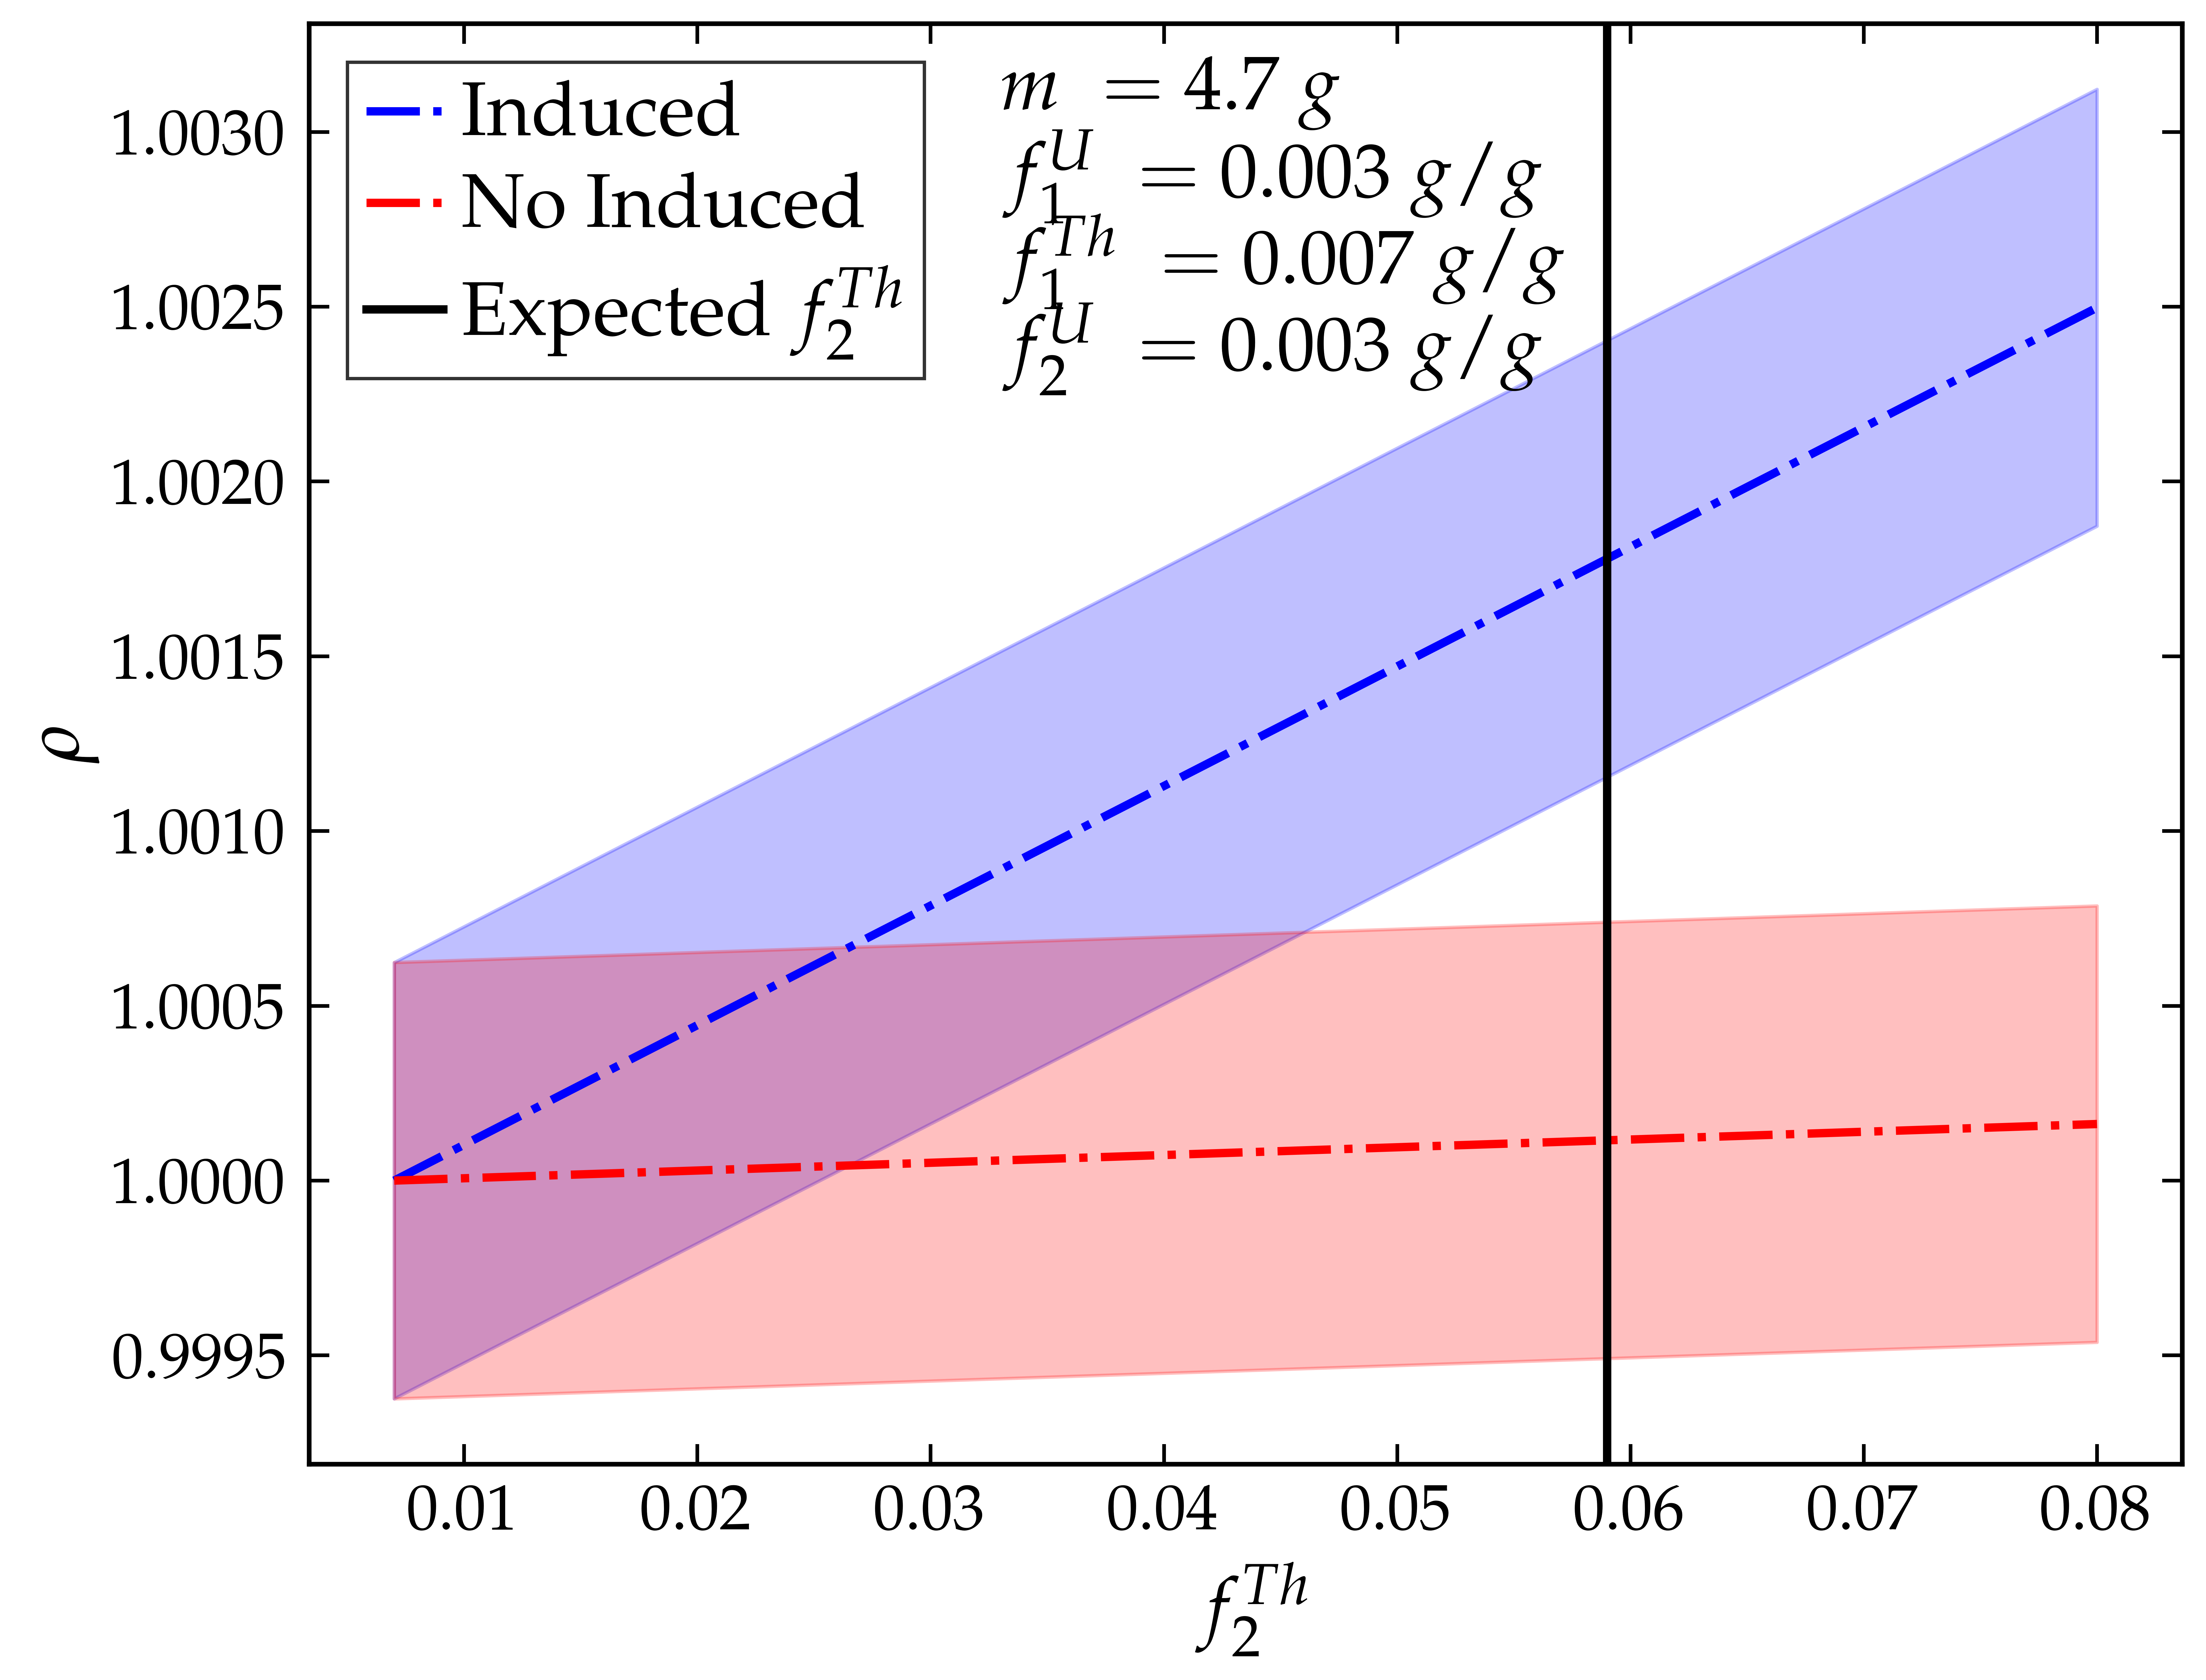

In [37]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 25,
        }

mass = (1**3)*rho_Zirc*1e-3
#number = Number100
number = Number1

f1U = 0.003
errorU = 0.001*1e-3
f1Th = 0.007
errorTh = 0.001*1e-3
f2U = 0.003
f2Th = np.linspace(0.007,0.08,100)


time = 4000/1e6
timeind = 2000/1e6

fig, axe = plt.subplots(figsize=(12, 8), dpi=800)

y1 = []
y2 = []
sigma1up = []
sigma1down = []
sigma2up = []
sigma2down = []

for i in range(len(f2Th)):
    y1.append(Ind(f2U,f2Th[i],time,number)/Ind(f1U,f1Th,time,number))
    #y1.append(Inddiff(f2U,f2Th[i],time,timeind,number)/Inddiff(f1U,f1Th,time,timeind,number))
    y2.append(NoInd(f2U,f2Th[i],time)/NoInd(f1U,f1Th,time))
    #sigma1up.append(y1[i]+sigma(Ind(f2U,f2Th[i],time,number),Ind(f1U,f1Th,time,number)))
    #sigma1down.append(y1[i]-sigma(Ind(f2U,f2Th[i],time,number),Ind(f1U,f1Th,time,number)))
    
    sigma1 = errorInd(f1U, f1Th, errorU, errorTh, time, number)
    sigma2 = errorInd(f2U, f2Th[i], errorU, errorTh, time, number)
    #sigma2 = np.sqrt(Ind(f2U,f2Th[i],time,number))
    #sigma1 = np.sqrt(Ind(f1U,f1Th,time,number))
    
    sigma1up.append(y1[i]+errorrho(Ind(f1U,f1Th,time,number),sigma1,Ind(f2U,f2Th[i],time,number),sigma2))
    sigma1down.append(y1[i]-errorrho(Ind(f1U,f1Th,time,number),sigma1,Ind(f2U,f2Th[i],time,number),sigma2))
    
    
    sigma1 = errorSp(f1U, f1Th, errorU, errorTh, time)
    sigma2 = errorSp(f2U, f2Th[i], errorU, errorTh, time)
    #sigma1 = np.sqrt(NoInd(f1U,f1Th,time))
    #sigma2 = np.sqrt(NoInd(f2U,f2Th[i],time))
    
    sigma2up.append(y2[i]+errorrho(NoInd(f1U,f1Th,time),sigma1,NoInd(f2U,f2Th[i],time),sigma2))
    sigma2down.append(y2[i]-errorrho(NoInd(f1U,f1Th,time),sigma1,NoInd(f2U,f2Th[i],time),sigma2))
    


axe.plot(f2Th,y1, label='Induced', color = 'blue', linestyle = '-.')
axe.fill_between(f2Th,sigma1down,sigma1up, color = 'blue', alpha = 0.25)
axe.plot(f2Th, y2, label='No Induced', color = 'red', linestyle = '-.')
axe.fill_between(f2Th,sigma2down,sigma2up, color = 'red', alpha = 0.25)
plt.axvline(x=0.059, ymin=0.0, ymax=1, color = 'black', label='Expected $f_2^{Th}$')
plt.ylabel("$\\rho$", fontsize=23.0)
plt.xlabel("$f_2^{Th}$", fontsize=23.0)
#plt.ylim(0.9994,1.0027)
plt.legend(loc=2, fontsize = 23.0)

txt = r"Time period = "+str(time*1e6)+" $yr$"
ax = plt.gca()
plt.text(0.37, 0.94, r"$m \ =$ "+str(mass*1e3)+" $g$",fontsize=23.0, transform=ax.transAxes)
plt.text(0.37, 0.88, r"$f_1^{U} \ =$ "+str(f1U)+" $g/g$",fontsize=23.0, transform=ax.transAxes)
plt.text(0.37, 0.82, r"$f_1^{Th} \ =$ "+str(f1Th)+" $g/g$",fontsize=23.0, transform=ax.transAxes)
plt.text(0.37, 0.76, r"$f_2^{U} \ =$ "+str(f2U)+" $g/g$",fontsize=23.0, transform=ax.transAxes)
plt.savefig("MuonFission.pdf",bbox_inches="tight")
plt.show()

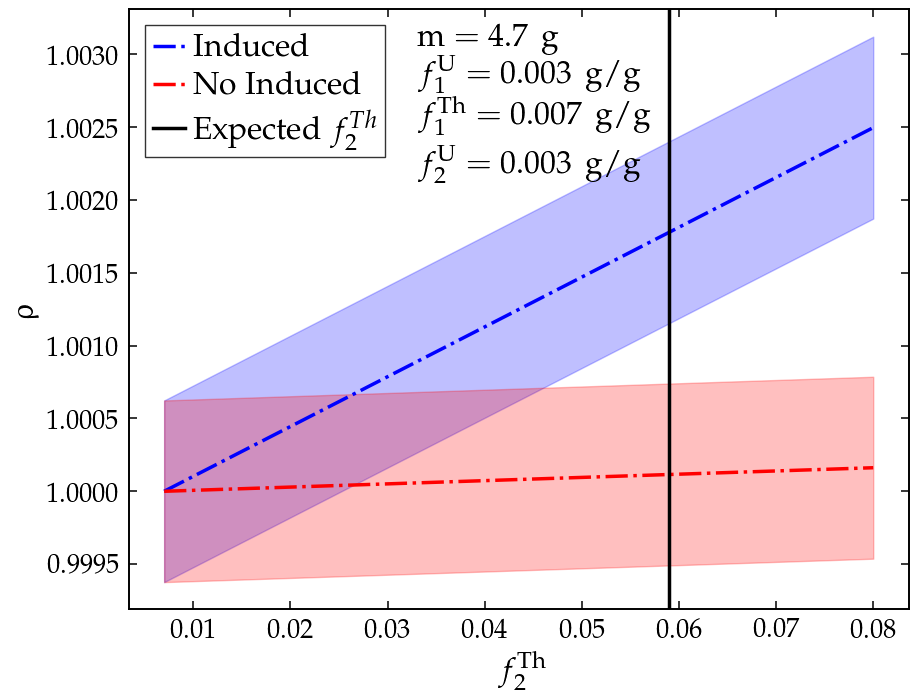

In [48]:
def num(f,C,time,i):
    N = 0
    for j in range(2):
        for k in range(2):
            N += f[i][j]*C[j][k]*time
    return N

def errortotal(N1,N2,f,C,sigmaf):
    rho = N1/N2
    errrho = 0.
    for i in range(2):
        den = 0.
        for j in range(2):
            for k in range(2):
                den += f[i][j]*C[j][k]
        den = den**2
        num = 0.
        for j in range(2):
            for k in range(2):
                num += (C[j][k]*sigmaf[i][j])**2/den
        errrho += num
    return rho*np.sqrt(1./N1+1./N2+errrho)

mass = (1**3)*rho_Zirc*1e-3
#number = Number100
number = Number1

CU = (BR_U)*(Na*1e3/(238))/tau_U*mass #[Myr^-1]
CUind = (0.14*number) #[Myr^-1]
CTh = (BR_Th)*(Na*1e3/(232))/tau_Th*mass #[Myr^-1]
CThind = (0.02*number) #[Myr^-1]

f1U = 0.003
errorU = 0.001*1e-3
f1Th = 0.007
errorTh = 0.001*1e-3
f2U = 0.003
f2Th = np.linspace(0.007,0.08,100)

sigmaf = [[errorU,errorTh],[errorU,errorTh]]

time = 4000/1e6
timeind = 4000/1e6

fig, axe = plt.subplots(figsize=(12,8))

y1 = []
y2 = []
sigma1up = []
sigma1down = []
sigma2up = []
sigma2down = []

for i in range(len(f2Th)):
    C = [[CU*time,CUind*timeind],[CTh*time,CThind*timeind]]
    f = [[f1U,f1Th],[f2U,f2Th[i]]]
    N1 = num(f,C,1,0)
    N2 = num(f,C,1,1)
    y1.append(N2/N1)
    sigma1 = errortotal(N2,N1,f,C,sigmaf)
    sigma1up.append(N2/N1+sigma1)
    sigma1down.append(N2/N1-sigma1)
    
    C = [[CU*time,0.],[CTh*time,0.]]
    N1 = num(f,C,1,0)
    N2 = num(f,C,1,1)
    y2.append(N2/N1)
    sigma2 = errortotal(N2,N1,f,C,sigmaf)
    sigma2up.append(N2/N1+sigma1)
    sigma2down.append(N2/N1-sigma1)
    
axe.plot(f2Th,y1, label='Induced', color = 'blue', linestyle = '-.')
axe.fill_between(f2Th,sigma1down,sigma1up, color = 'blue', alpha = 0.25)
axe.plot(f2Th, y2, label='No Induced', color = 'red', linestyle = '-.')
axe.fill_between(f2Th,sigma2down,sigma2up, color = 'red', alpha = 0.25)
plt.axvline(x=0.059, ymin=0.0, ymax=1, color = 'black', label='Expected $f_2^{Th}$')
plt.ylabel("$\\uprho$", fontsize=23.0)
plt.xlabel(r"$f_2^{\text{Th}}$", fontsize=23.0)
#plt.ylim(0.9994,1.0027)
plt.legend(loc=2, fontsize = 23.0)

txt = r"Time period = "+str(time*1e6)+" $\\mathrm{yr}$"
ax = plt.gca()
plt.text(0.37, 0.94, r"$\text{m}=$ "+str(mass*1e3)+" $\,\\mathrm{g}$",fontsize=23.0, transform=ax.transAxes)
plt.text(0.37, 0.88, r"$f_1^{\text{U}}=$ "+str(f1U)+" $\,\\mathrm{g}/\\mathrm{g}$",fontsize=23.0, transform=ax.transAxes)
plt.text(0.37, 0.81, r"$f_1^{\text{Th}}=$ "+str(f1Th)+" $\,\\mathrm{g}/\\mathrm{g}$",fontsize=23.0, transform=ax.transAxes)
plt.text(0.37, 0.73, r"$f_2^{\text{U}}=$ "+str(f2U)+" $\,\\mathrm{g}/\\mathrm{g}$",fontsize=23.0, transform=ax.transAxes)
plt.savefig("MuonFission.pdf",bbox_inches="tight")
plt.show()

In [46]:
def plotGraph(f1U, f2U, f1Th, f2Th, time, N, number):
    font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 25,
        }
    
    fig, axe = plt.subplots(figsize=(12, 8), dpi=800)

    y1 = []
    y2 = []
    sigma1up = []
    sigma1down = []
    sigma2up = []
    sigma2down = []

    for i in range(len(f2Th)):
        #y1.append(Ind(f2U,f2Th[i],time,N)/Ind(f1U,f1Th,time,N))
        y1.append(Inddiff(f2U,f2Th[i],time,timeind,N)/Inddiff(f1U,f1Th,time,timeind,N))
        y2.append(NoInd(f2U,f2Th[i],time)/NoInd(f1U,f1Th,time))
        #sigma1up.append(y1[i]+sigma(Ind(f2U,f2Th[i],time,N),Ind(f1U,f1Th,time,N)))
        #sigma1down.append(y1[i]-sigma(Ind(f2U,f2Th[i],time,N),Ind(f1U,f1Th,time,N)))
        sigma1up.append(y1[i]+sigma(Inddiff(f2U,f2Th[i],time,timeind,N),Inddiff(f1U,f1Th,time,timeind,N)))
        sigma1down.append(y1[i]-sigma(Inddiff(f2U,f2Th[i],time,timeind,N),Inddiff(f1U,f1Th,time,timeind,N)))
        sigma2up.append(y2[i]+sigma(NoInd(f2U,f2Th[i],time),NoInd(f1U,f1Th,time)))
        sigma2down.append(y2[i]-sigma(NoInd(f2U,f2Th[i],time),NoInd(f1U,f1Th,time)))
    
    #print(y2)
    plt.axvline(x=0.059, ymin=0.0, ymax=1, color = 'black', label='Expected $^{232}f$')
    axe.plot(f2Th,y1, label='Induced', color = 'blue', linestyle = '-.')
    axe.fill_between(f2Th,sigma1down,sigma1up, color = 'blue', alpha = 0.25)
    axe.plot(f2Th, y2, label='No Induced', color = 'red', linestyle = '-.')
    axe.fill_between(f2Th,sigma2down,sigma2up, color = 'red', alpha = 0.25)

    plt.ylabel("$\\rho$")
    plt.xlabel("$f_2^{Th}$")
    #plt.ylim(0.9994,1.0027)
    plt.legend(loc=2)
    plt.title("Final $^{238}U$ fraction = "+str(f2U))

    #txt = r"Time period = "+str(time*1e6)+" $yr$"
    #axe.text(0.015, 1.0016, txt, fontdict = font)
    #
    if (number<10):
        plt.savefig('./Figurefrac/rhovsf_'+str(N)+'_00'+str(number)+'.png')
    elif (number<100 and number >= 10):
        plt.savefig('./Figurefrac/rhovsf_'+str(N)+'_0'+str(number)+'.png')
    else: plt.savefig('./Figurefrac/rhovsf_'+str(N)+'_'+str(number)+'.png')
    plt.close(fig)

In [129]:
f1U = 0.003
f1Th = 0.007
f2U = np.linspace(0.003, 0.018, 16)
f2Th = np.linspace(0.007,0.08,100)
time = 4000/1e6
mass = (1**3)*rho_Zirc*1e-3
n = Number1

for i in range(16):
    print(i)
    plotGraph(f1U, f2U[i], f1Th, f2Th, time, n, i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [130]:
import os
import imageio

j = 0
png_dir = './Figurefrac'
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.png'):
        print(j)
        j = j+1
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))

0


/var/folders/rs/y31t400d08x63f54tfx6sjy00000gp/T/ipykernel_34531/3782883296.py:12: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_path))


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [131]:
# Make it pause at the end so that the viewers can ponder
for i in range(16):
    print(i)
    images.append(imageio.imread(file_path))

imageio.mimsave('./Figurefrac1cmInddiff.gif', images)

0


/var/folders/rs/y31t400d08x63f54tfx6sjy00000gp/T/ipykernel_34531/2144225311.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_path))


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
